# Phase 2 Results Analysis

In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from Test_Functions import plotsteps,plotreward,plotdata
import pandas as pd
from sklearn.preprocessing import minmax_scale
#from sklearn.preprocessing import LabelEncoder
%matplotlib inline
experiements = pd.read_csv('Final.csv')
#experiements.columns
#experiements = experiements[experiements.experiment>40].reset_index(drop=True)


experiements['tr_AR'] = experiements['tr_TR']/experiements['tr_count']
experiements['tr_AS'] = experiements['tr_TS']/experiements['tr_count']
experiements['ts_AR'] = experiements['ts_TR']/experiements['ts_count']
experiements['ts_AS'] = experiements['ts_TS']/experiements['ts_count']
experiements = experiements[experiements.experiment>207]
experiements = experiements[experiements.experiment<1000]
#experiements = experiements.sort_values('ts_AR',ascending=False).head(10).reset_index(drop=True)

In [2]:
total_time=0
for i in experiements.experiment:
    #if i>183:
    #    continue
    #print(i)
    dataset = pd.read_csv("{}/exp_details.csv".format(i),header=None)
    total_time+= dataset[3].sum()
total_time/3600/24

0.58744525738060471

In [3]:
eid=208
exp = pd.read_csv('{}/exp_details.csv'.format(eid),header=None)
test = exp[exp[7]=='Test']
train= exp[exp[7]=='train']
train = train[2]
test = test[2]
print(train[train<0].count()/train.count(),train[train>0].count()/train.count())
print(test[test<0].count()/test.count(),test[test>0].count()/test.count())

1.0 0.0
0.999810570184 0.000189429816253


In [4]:
pd.options.display.max_columns=32

In [5]:
#experiements = experiements[experiements.experiment]

In [6]:
experiements.head()

,experiment,reply_size,layers,tau,optimizer,advantage,max_steps,activation,batch_size,totalsteps,exploration,vanish,gamma,hidden_size,train_repeat,batch_norm,seed,rwrdschem,svision,details,tr_count,tr_TR,tr_TT,tr_TS,ts_count,ts_TR,ts_TT,ts_TS,tr_AR,tr_AS,ts_AR,ts_AS
202,208,100000,1,0.001,adam,max,1000,tanh,32,500000,0.01,0.75,0.99,100,1,False,1111,"[-100.0, 1000.0, -0.1]",180,zombie agent,52786,-110000,5893,500002,5279,-4012,661,50129,-2.083886,9.472246,-0.759992,9.495927
203,209,100000,1,0.001,adam,max,1000,tanh,32,500000,0.01,0.75,0.99,100,1,False,4444,"[-100.0, 1000.0, -0.1]",180,zombie agent,58157,-119000,5933,500001,5816,-7983,529,49831,-2.046185,8.597435,-1.372593,8.567916
204,210,100000,1,0.001,adam,max,1000,tanh,32,500000,0.01,0.75,0.99,100,1,False,5423,"[-100.0, 1000.0, -0.1]",180,zombie agent,48817,-65000,6037,500005,4882,-11003,529,50038,-1.331503,10.242436,-2.253789,10.249488
205,211,100000,1,0.001,adam,max,1000,tanh,32,500000,0.01,0.75,0.99,100,1,False,6654,"[-100.0, 1000.0, -0.1]",180,zombie agent,54368,-77000,6031,500003,5437,-8000,518,50000,-1.416274,9.196641,-1.471400,9.196248
206,212,100000,1,0.001,adam,max,1000,tanh,32,500000,0.01,0.75,0.99,100,1,False,9111,"[-100.0, 1000.0, -0.1]",180,zombie agent,52570,-82000,5543,500008,5258,-10999,471,49993,-1.559825,9.511280,-2.091860,9.507988


## Correlation between Training And testing
* <b>Steps: less better</b>
* <b>Reward: more better</b>

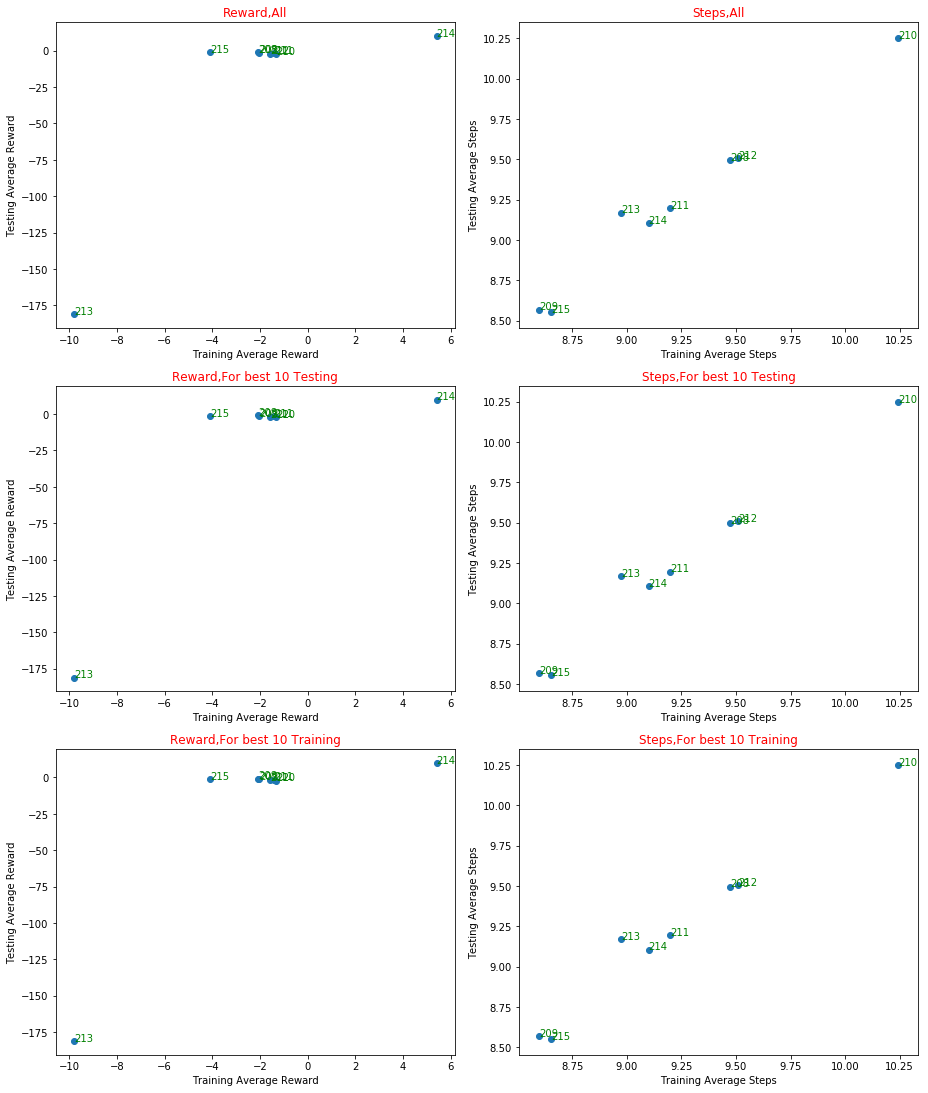

In [7]:
#experiements = experiements[experiements.experiment>68]
plt.figure(figsize=(13,30))
WantedScopes=[]
#All Experiments
WantedScopes.append((experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']],'All'))
#Top 10 depending on Average Reward for test
WantedScopes.append((experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']].sort_values('ts_AR',ascending=False).head(10),'For best 10 Testing'))
#Top 10 AR for Training
WantedScopes.append((experiements[['experiment','tr_AR','ts_AR','tr_AS','ts_AS']].sort_values('tr_AR',ascending=False).head(10),'For best 10 Training'))
counter=1
for tt,strng in WantedScopes:
    
    ax = plt.subplot(6,2,counter)
    counter+=1
    ax.scatter(tt.tr_AR,tt.ts_AR)
    ax.set_title('Reward,{}'.format(strng),color='red')
    ax.set_xlabel('Training Average Reward')
    ax.set_ylabel('Testing Average Reward')
    for i in range(tt.shape[0]):
        ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AR'],tt.iloc[i]['ts_AR']),color='green')
    ax = plt.subplot(6,2,counter)
    for i in range(tt.shape[0]):
        ax.annotate(int(tt.iloc[i]['experiment']),(tt.iloc[i]['tr_AS'],tt.iloc[i]['ts_AS']),color='green')
    ax.scatter(tt.tr_AS,tt.ts_AS)
    ax.set_title('Steps,{}'.format(strng),color='red')
    ax.set_xlabel('Training Average Steps')
    ax.set_ylabel('Testing Average Steps')
    counter +=1
plt.tight_layout()
plt.show()

## Best Average Training Reward
* Each row represent the an experiement that contain at least 10K episode.

In [8]:
wantedcolumns = experiements.columns[[0,1,2,3,5,7,8,10,13,14,16,20,24,28,30]]
wantedcolumns

Index(['experiment', 'reply_size', 'layers', 'tau', 'advantage', 'activation',
       'batch_size', 'exploration', 'hidden_size', 'train_repeat', 'seed',
       'tr_count', 'ts_count', 'tr_AR', 'ts_AR'],
      dtype='object')

In [9]:
experiements.sort_values('tr_AR',ascending=False)[wantedcolumns].head(10)

,experiment,reply_size,layers,tau,advantage,activation,batch_size,exploration,hidden_size,train_repeat,seed,tr_count,ts_count,tr_AR,ts_AR
208,214,100000,1,0.001,max,tanh,32,0.01,100,1,1337,54944,5495,5.405486,9.826388
204,210,100000,1,0.001,max,tanh,32,0.01,100,1,5423,48817,4882,-1.331503,-2.253789
205,211,100000,1,0.001,max,tanh,32,0.01,100,1,6654,54368,5437,-1.416274,-1.471400
206,212,100000,1,0.001,max,tanh,32,0.01,100,1,9111,52570,5258,-1.559825,-2.091860
203,209,100000,1,0.001,max,tanh,32,0.01,100,1,4444,58157,5816,-2.046185,-1.372593
202,208,100000,1,0.001,max,tanh,32,0.01,100,1,1111,52786,5279,-2.083886,-0.759992
209,215,100000,1,0.001,max,tanh,32,0.01,100,1,4917,57783,5779,-4.084246,-1.201246
207,213,100000,1,0.001,max,tanh,32,0.01,100,1,1122,55712,5572,-9.800402,-181.103374


## Best Average Testing Reward
* Each row represent the an experiement that contain at least 10K episode.

In [10]:
experiements.sort_values('ts_AR',ascending=False)[wantedcolumns].head()

,experiment,reply_size,layers,tau,advantage,activation,batch_size,exploration,hidden_size,train_repeat,seed,tr_count,ts_count,tr_AR,ts_AR
201,207,100000,1,0.001,max,tanh,32,0.01,100,1,1337,145916,14592,997.477864,991.100055
196,202,100000,1,0.001,max,tanh,32,0.01,100,1,4444,107689,10769,996.852046,985.304207
109,110,100000,1,0.001,max,tanh,32,0.01,100,1,4917,48454,4846,994.530854,985.058399
200,206,100000,1,0.001,max,tanh,32,0.01,100,1,1122,135688,13569,996.138192,982.338713
35,36,100000,1,0.001,max,tanh,10,0.01,100,1,4917,40783,4079,992.545889,981.326551


# Full parameters Analysis

In [11]:
experiements.columns

Index(['experiment', 'reply_size', 'layers', 'tau', 'optimizer', 'advantage',
       'max_steps', 'activation', 'batch_size', 'totalsteps', 'exploration',
       'vanish', 'gamma', 'hidden_size', 'train_repeat', 'batch_norm', 'seed',
       'rwrdschem', 'svision', 'details', 'tr_count', 'tr_TR', 'tr_TT',
       'tr_TS', 'ts_count', 'ts_TR', 'ts_TT', 'ts_TS', 'tr_AR', 'tr_AS',
       'ts_AR', 'ts_AS'],
      dtype='object')

## episode vs step
* The text above each two plots represent :
    * Experiment ID (1, 2 .....)
    * tau (0.1,0.01,0.001,0001)
    * advantage (naive , avg , max)
    * activation ( relu , tanh)
    * Exploration (0.1, 0.01, 0.001)
    * seed (1337 , 4917)
* Used colors in the plots
    * <b>blue</b> the line color
    * <b>Green</b> part is done in exploration
    * <b>Yellow</b> part is done without exploration

In [12]:
experiements[experiements.tr_count==experiements.tr_count.max()]

,experiment,reply_size,layers,tau,optimizer,advantage,max_steps,activation,batch_size,totalsteps,exploration,vanish,gamma,hidden_size,train_repeat,batch_norm,seed,rwrdschem,svision,details,tr_count,tr_TR,tr_TT,tr_TS,ts_count,ts_TR,ts_TT,ts_TS,tr_AR,tr_AS,ts_AR,ts_AS
201,207,100000,1,0.001,adam,max,1000,tanh,32,2000000,0.01,0.75,0.99,100,1,False,1337,"[-10, 1000, -0.1]",180,zombie agent,145916,145547980,12986,2000192,14592,14462132,1411,278680,997.477864,13.707832,991.100055,19.098136


In [13]:
experiements = experiements.sort_values('ts_AR',ascending=False).head(5).reset_index(drop=True)

In [49]:
exp = pd.read_csv('207/exp_details.csv',header=None)
exp = exp[exp[7]=='Test']
exp = exp[exp[0]>13000]
exp = exp[exp[2]<-50]
exp

,0,1,2,3,4,5,6,7
153878,13989,1000,-100.0,3.855134,450,0,0,Test
154241,14022,1000,-100.0,3.334390,213,0,0,Test


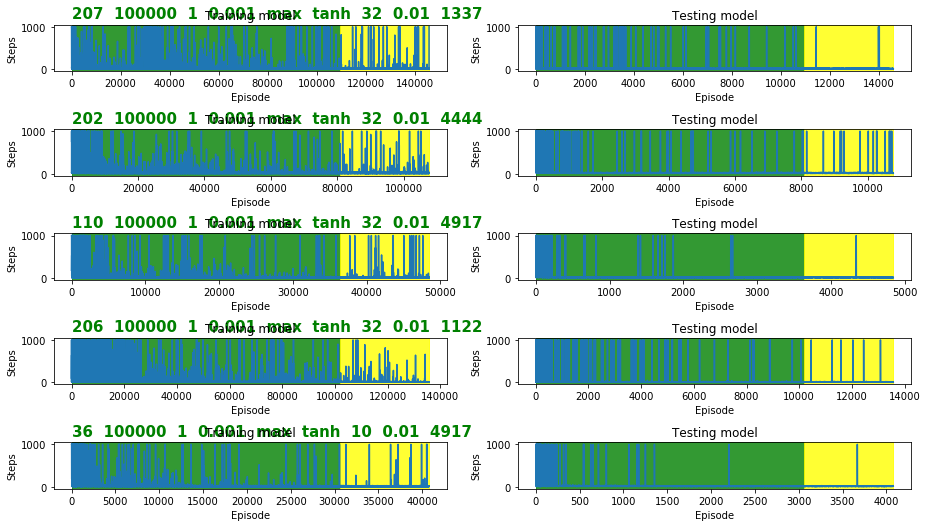

In [14]:
x = experiements.experiment.max()*2
y = 2
z=0
plt.figure(figsize=(13,600))
for i in experiements.experiment.as_matrix():
    txt = experiements[experiements.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=experiements.columns[[0,1,2,3,5,7,8,10,16]],\
                                                         header=False,index=False)
    plotsteps(i,x,y,z,txt,vanish)
    z+=2
plt.tight_layout()

## episode vs reward

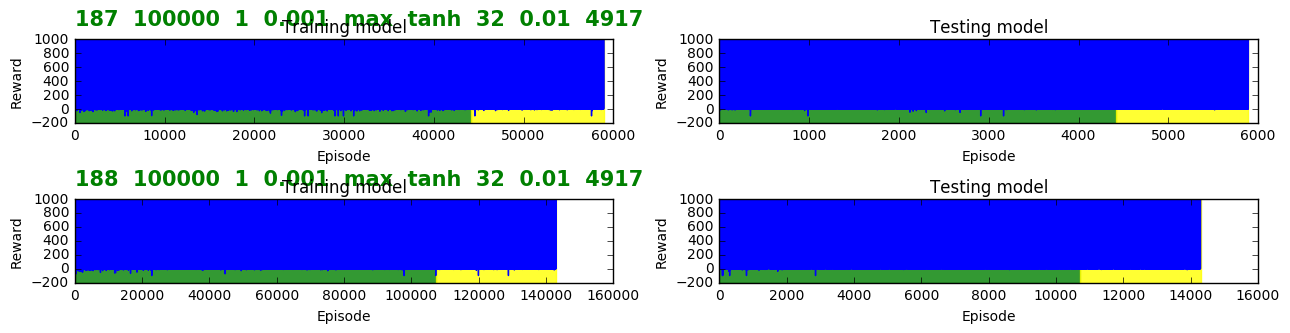

In [13]:
x = experiements.experiment.max()*2
y = 2
z=0
plt.figure(figsize=(13,600))
for i in experiements.experiment.as_matrix():
    txt = experiements[experiements.experiment==i]
    vanish = txt.vanish.as_matrix()
    txt = txt.to_string(columns=experiements.columns[[0,1,2,3,5,7,8,10,16]],\
                                                         header=False,index=False)
    plotreward(i,x,y,z,txt,vanish)
    z+=2
plt.tight_layout()
plt.savefig('pic.png')